# Price Data EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfPrice = pd.read_csv(r'C:\Users\Aymen\Desktop\BCG Forage\Task 2\price_data.csv')
dfPrice.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [3]:
dfPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### View object types of 'id' and 'price_date'

In [4]:
print(type(dfPrice['id'][0]))
print(type(dfPrice['price_date'][0]))

<class 'str'>
<class 'str'>


##### 'price_date' needs to be converted to datetime

In [5]:
dfPrice['price_date'] = pd.to_datetime(dfPrice['price_date'])
print(type(dfPrice['price_date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
dfPrice.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Data Cleaning
#### Step 1: Turn all instances of '0' into Null values

In [7]:
print(dfPrice.equals(dfPrice.replace(float(0), np.nan)))
dfPrice = dfPrice.replace(float(0), np.nan)

False


#### Steph 2: Ensure all dates are on the first of every month.

In [8]:
for date in pd.unique(dfPrice['price_date']):
    if pd.to_datetime(date).day != 1:
        print(date)

#### Step 3: Check for duplicate entries using 'id' and 'price_date'

In [9]:
dfPrice[dfPrice.duplicated(['id', 'price_date'])]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


#### Step 4: Search for outliers

c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

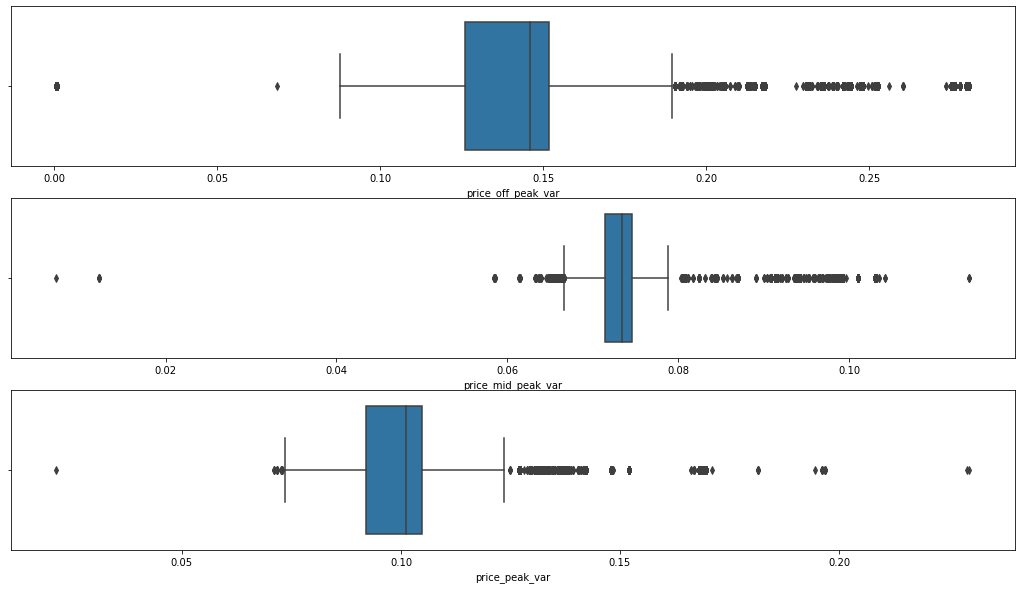

In [10]:
fig, axs = plt.subplots(nrows=3, figsize=(18,10))
# Plot histogram
sns.boxplot(dfPrice["price_off_peak_var"], ax=axs[0])
sns.boxplot(dfPrice["price_mid_peak_var"],ax=axs[1])
sns.boxplot(dfPrice["price_peak_var"], ax=axs[2])
plt.show()

c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

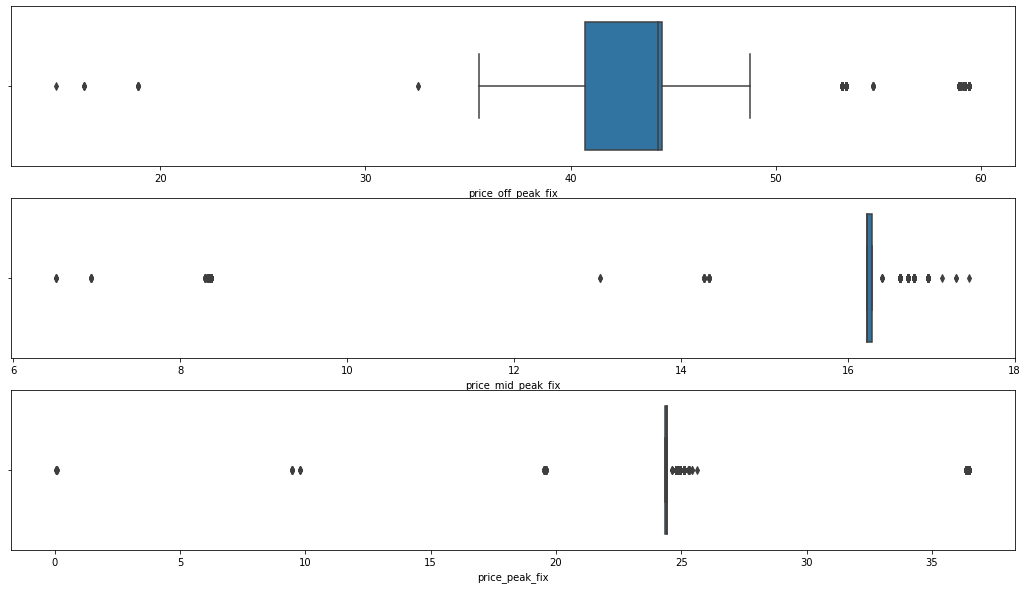

In [11]:
fig, axs = plt.subplots(nrows=3, figsize=(18,10))
# Plot histogram
sns.boxplot(dfPrice["price_off_peak_fix"], ax=axs[0])
sns.boxplot(dfPrice["price_mid_peak_fix"],ax=axs[1])
sns.boxplot(dfPrice["price_peak_fix"], ax=axs[2])
plt.show()

## Summary
- Original dataset contained no null entries
- All price data was recorded on the first of every month
- Price dataset contained no duplicate entries
- Replaced 0s with Null
- Unsure about existence of outliers